In [1]:
import pandas as pd
import numpy as np
import algos.shallow_nn as shallow_nn
import algos.logistic_regression as logistic_regression
import pylab as plt

In [2]:
data = pd.read_csv("datasets/heart/heart.csv")
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
1,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
2,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
3,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1
4,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


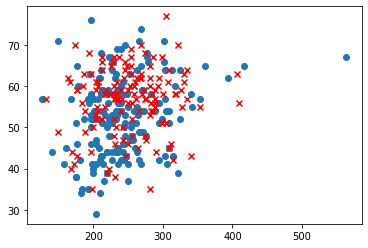

In [3]:
plt.scatter(data[data.target == 1]["chol"], data[data.target == 1]["age"], marker="o")

plt.scatter(data[data.target == 0]["chol"], data[data.target == 0]["age"], marker="x", color="red")

In [4]:
y = data["target"]

features = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
X = pd.get_dummies(data[features])

y = np.array([y]).T
X = np.array(X)

y = y.astype(np.float)
X = y.astype(np.float)

X_train = X[:(int(len(X)*0.75)), :].T
X_val = X[(int(len(X)*0.75)):, :].T
y_train = y[:(int(len(X)*0.75)), :].T
y_val = y[(int(len(X)*0.75)):, :].T


In [5]:
nn_model = shallow_nn.model(X_train, y_train, X_val, y_val, n_h = 5, learning_rate=0.1, print_cost = True)

Cost after iteration 0: 0.693070
Cost after iteration 500: 0.019719
Cost after iteration 1000: 0.006129
Cost after iteration 1500: 0.003476
train accuracy: 100.0 %
test accuracy: 100.0 %


In [6]:
lr_model = logistic_regression.model(X_train, y_train, X_val, y_val, num_iterations=2000, learning_rate=0.5, print_cost=True, reg_term=1)

Cost after iteration 0: 0.693147
Cost after iteration 500: 0.127600
Cost after iteration 1000: 0.127499
Cost after iteration 1500: 0.127499
train accuracy: 100.0 %
test accuracy: 100.0 %
